In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(df.species.value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [5]:
X = df.drop(columns=['species'])
y = df.species

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1, stratify=y)

In [8]:
model = KNeighborsClassifier()
scores=cross_val_score(model, X_train,y_train, cv=5)
print("validation Accuracy, Unscaled", scores.mean())

validation Accuracy, Unscaled 0.9333333333333332


In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Validation Accuracy, MinMaxScaler", scores.mean())

Validation Accuracy, MinMaxScaler 0.9428571428571428


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("validation accuracy, StandardScaler",scores.mean())


validation accuracy, StandardScaler 0.9523809523809523


In [20]:
training_accuracy=[]
validation_accuracy=[]
for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("k: ", k, "validation accuracy:",scores.mean())

k:  1 validation accuracy: 0.9428571428571428
k:  2 validation accuracy: 0.9333333333333333
k:  3 validation accuracy: 0.9428571428571428
k:  4 validation accuracy: 0.9428571428571428
k:  5 validation accuracy: 0.9333333333333332
k:  6 validation accuracy: 0.9333333333333332
k:  7 validation accuracy: 0.9333333333333332
k:  8 validation accuracy: 0.9333333333333332
k:  9 validation accuracy: 0.9428571428571428
k:  10 validation accuracy: 0.9333333333333332
k:  11 validation accuracy: 0.9333333333333332
k:  12 validation accuracy: 0.9428571428571428
k:  13 validation accuracy: 0.9333333333333332
k:  14 validation accuracy: 0.9428571428571428
k:  15 validation accuracy: 0.9428571428571428
k:  16 validation accuracy: 0.9333333333333333
k:  17 validation accuracy: 0.9333333333333333
k:  18 validation accuracy: 0.9333333333333333
k:  19 validation accuracy: 0.9333333333333333
k:  20 validation accuracy: 0.9333333333333333
k:  21 validation accuracy: 0.9428571428571428
k:  22 validation accu

In [17]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print("Training acuuracy", model.score(X_train, y_train))
print("test accuracy:", model.score(X_test, y_test))

Training acuuracy 1.0
test accuracy: 0.9777777777777777


In [16]:
y_predict = model.predict(X_test)
CM = confusion_matrix(y_test, y_predict)
print(CM)
print("test accuracy:", model.score(X_test, y_test))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
test accuracy: 0.9777777777777777


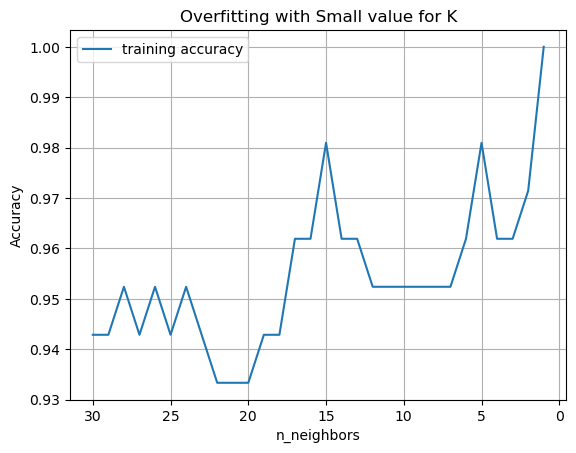

In [22]:
plt.plot(range(1,31), training_accuracy, label="training accuracy")
# plt.plot(range(1,31), validation_accuracy, label="validation accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Overfitting with Small value for K")
ax = plt.gca()
ax.invert_xaxis()
plt.grid()
plt.savefig("Q2.overfitting.png")
plt.show()